In [1]:
import epmwebapi as epm
import numpy as np
import datetime
import matplotlib.pyplot as plt

#crie o objeto de conexão informando os endereços do EPM Webserver(Authentication Port e WEB API Port), usuário e senha.
connection = epm.EpmConnection('http://localhost:44333', 'http://localhost:44332', 'sa', 'Epm2017')

#nomes das basic variables
wind = 'SP01_WindSpeedAvg'
power = 'SP01_PowerAvg'
direction = 'SP01_WindDirection'

#intervalo da consulta
initime = datetime.datetime(2014, 3, 1, 0, 0, 0, 0)
endtime = initime + datetime.timedelta(days=5)

#busca o objeto no EPM Server
bv_wind = connection.getDataObjects([wind])
bv_power = connection.getDataObjects([power])
bv_direction = connection.getDataObjects([direction])

#confugura a consulta
queryperiod = epm.QueryPeriod(initime, endtime)
processInterval = datetime.timedelta(seconds=600)
aggregationdetails = epm.AggregateDetails(processInterval, epm.AggregateType.Interpolative)

#realiza a consulta
wind_data = bv_wind[wind].historyReadAggregate(aggregationdetails, queryperiod)
power_data = bv_power[power].historyReadAggregate(aggregationdetails, queryperiod)
direction_data = bv_direction[direction].historyReadAggregate(aggregationdetails, queryperiod)

connection.close()

Text(0.5, 0, 'Power')

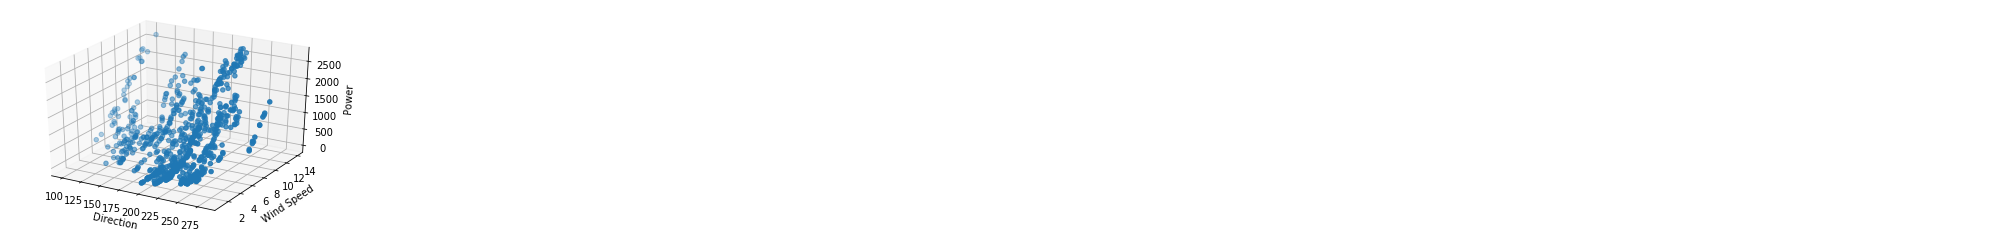

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


x, y, z = direction_data['Value'], wind_data['Value'], power_data['Value']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

ax.set_xlabel('Direction')
ax.set_ylabel('Wind Speed')
ax.set_zlabel('Power')


ValueError: 'vertices' must be a 2D list or array with shape Nx2

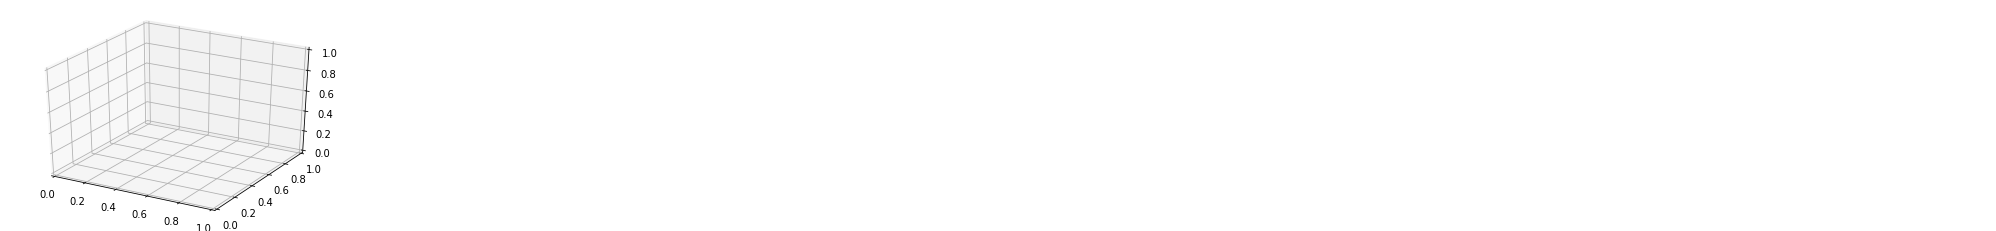

In [17]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def cc(arg):
    '''
    Shorthand to convert 'named' colors to rgba format at 60% opacity.
    '''
    return mcolors.to_rgba(arg, alpha=0.6)





fig = plt.figure()
ax = fig.gca(projection='3d')

# Make verts a list, verts[i] will be a list of (x,y) pairs defining polygon i
verts = []

# Set up the x sequence
xs = np.linspace(0., 10., 26)



verts.append( direction_data['Value'])
verts.append( power_data['Value'])
verts.append( wind_data['Value'])


poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b')])
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0, 10)
ax.set_ylim(-1, 4)
ax.set_zlim(0, 1)

plt.show()